# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



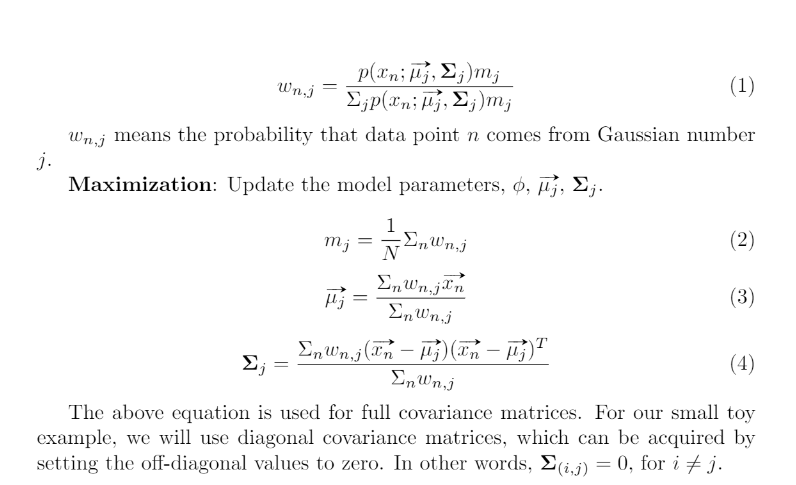

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        w = np.zeros((data.shape[0], len(self.mixture_weight)))

        for j in range(len(self.mixture_weight)):
            w[:,j] = self.mixture_weight[j] * \
            multivariate_normal.pdf(data, mean=self.mean_params[j], cov=self.cov_params[j])

        w /= w.sum(axis=1, keepdims=True)

        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        N, D = data.shape
        sum_w_nj = w.sum(axis=0) + 1e-10
        self.mixture_weight = sum_w_nj/N
        for j in range(len(self.mixture_weight)):
            self.mean_params[j] = np.sum(w[:, j, np.newaxis] * data, axis=0) /sum_w_nj[j]

            diff = data - self.mean_params[j]
            full_cov = (w[:, j, np.newaxis] * diff).T @ diff / sum_w_nj[j]
            self.cov_params[j] = np.diag(np.diag(full_cov)) + np.eye(D) * 1e-6
        
    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE
        w_densities = np.zeros((data.shape[0], len(self.mixture_weight)))
        for j in range(len(self.mixture_weight)):
            w_densities[:, j] = self.mixture_weight[j] * \
            multivariate_normal.pdf(data, mean=self.mean_params[j], cov=self.cov_params[j])

        log_prob = np.sum(np.log(w_densities.sum(axis=1)))
        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE
            w = self.estimation_step(data)
            self.maximization_step(data, w)

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [3]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619512 0.        ]
  [0.         4.28700711]]

 [[0.51645679 0.        ]
  [0.         0.13152718]]

 [[4.66666768 0.        ]
  [0.         2.88888991]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.4071157  0.25955009 0.33333421]
mu :
 [[ 6.27176603  6.27263099]
 [ 1.72091785  2.14764973]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94671925 0.        ]
  [0.         2.9384638 ]]

 [[0.49649576 0.        ]
  [0.         0.12585029]]

 [[4.66673188 0.        ]
  [0.         2.88900336]]]
-------------------------------------------------------------
Iteration

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



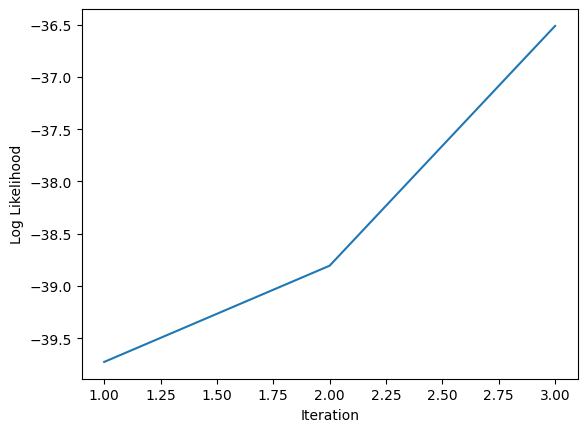

In [4]:
# TODO
plt.plot(range(1, num_iterations + 1), log_prob_list)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.show()

    ANS : Yes, It grow up every iterations.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [5]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666765 0.        ]
  [0.         5.88888989]]

 [[4.66666777 0.        ]
  [0.         2.8888901 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944855 0.        ]
  [0.         5.89275225]]

 [[4.66807042 0.        ]
  [0.         2.89103419]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.6665114 ]]
covariance matrix :
 [[[6.91946472 0.        ]
  [0.         5.89277511]]

 [[4.66807854 0.        ]
  [0.         2.89104666]

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

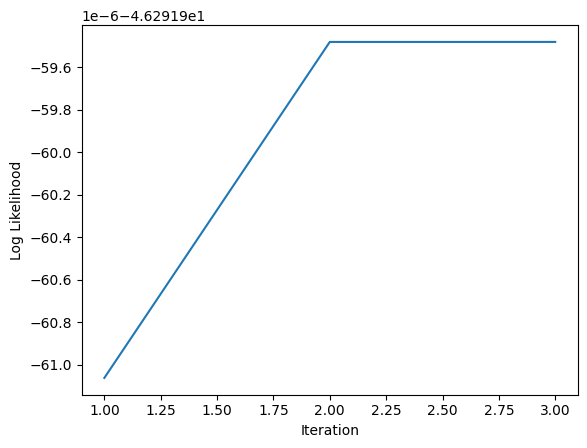

In [6]:
# TODO: Plot log_likelihood from T3
plt.plot(range(1, num_iterations + 1), log_prob_list2)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.show()

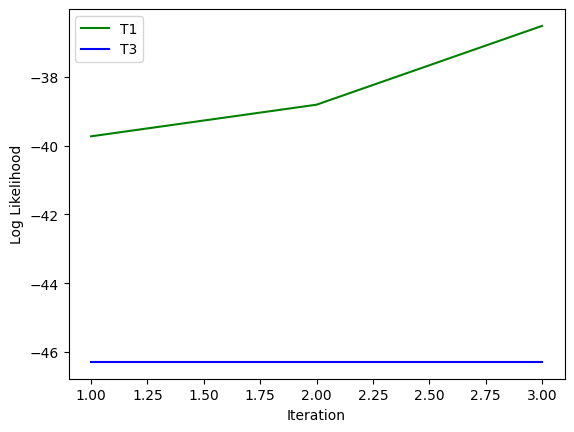

In [7]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
plt.plot(range(1, num_iterations + 1), log_prob_list, color='green', label='T1')
plt.plot(range(1, num_iterations + 1), log_prob_list2, color='blue', label='T3')
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.legend()
plt.show()

    ANS : The T1 (3 mixture) looks better because it has a higher log likelihood for each iteration

# The face database

In [8]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip
import sys
!{sys.executable} -m pip install scikit-image

In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [10]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

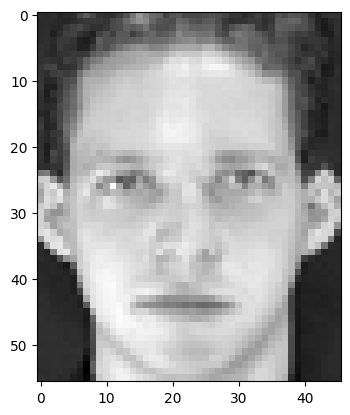

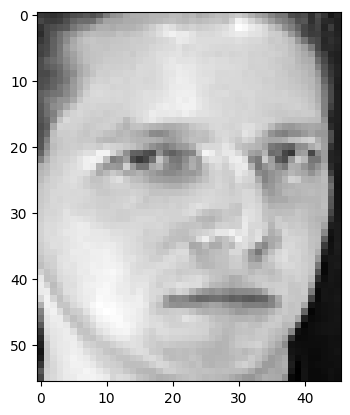

In [11]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

plt.imshow(xf[0,1], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [12]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(np.sum(np.square(x1 - x2)))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


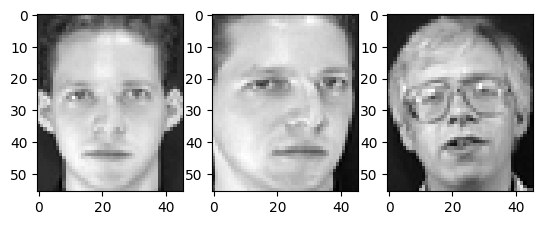

In [13]:
# TODO: Show why does the numbers make sense
plt.subplot(1,3,1)
plt.imshow(xf[0,0], cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(xf[0,1], cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(xf[1,0], cmap = 'gray')
plt.show()

    ANS : The pose of xf[0,0] is similar to xf[1,0], while xf[0,1] appear to be the same face as xf[0,0] but from a different perspective. In my opinion, It not make sense in detail.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [14]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    reduced = matrix.copy()
    p, i, h, w = reduced.shape
    return matrix.reshape(p * i, h * w)


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.zeros((A.shape[0], B.shape[0]), dtype=np.float64)
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            similarity_matrix[i][j] = L2_dist(A[i], B[j])
    
    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()
    # print("All pass")

test_generate_similarity_matrix()

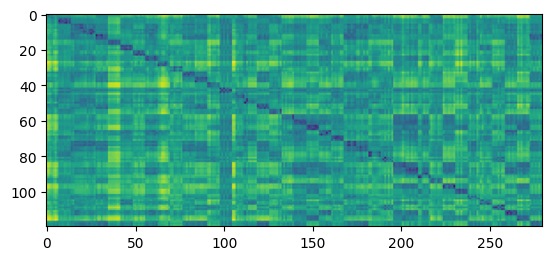

In [15]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE
T = organize_shape(xf[:,:3])
D = organize_shape(xf[:,3:])

similarity_matrix = generate_similarity_matrix(T,D)

plt.imshow(similarity_matrix)
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


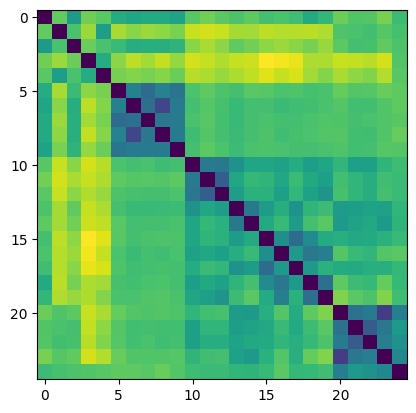

In [16]:
# INSERT CODE HERE
T_7 = organize_shape(xf[:5,:5])

similarity_matrix_7 = generate_similarity_matrix(T_7,T_7)
plt.imshow(similarity_matrix_7)
plt.show()

        ANS : The black color mean the closer. then the [5:10][5:10] means all the pose of person number 2 are closer. while others is not similar.

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [17]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    identity_matrix = similarity_matrix.reshape(40, 3, 280).min(axis=1)
    y_true = np.zeros((40, 280))
    for i in range(40):
        y_true[i, i*7 : (i+1)*7] = 1

    y_pred = (identity_matrix < threshold).astype(int)
    tp = np.sum((y_pred == 1) & (y_true == 1))
    total_positives = np.sum(y_true)
    true_pos_rate = tp / total_positives

    fp = np.sum((y_pred == 1) & (y_true == 0))
    total_negatives = np.sum(y_true == 0)
    false_pos_rate = fp / total_negatives

    return true_pos_rate, false_pos_rate

# Quick check
# (true_pos_rate, false_pos_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429, 0.33507326007326005)

In [18]:
# INSERT CODE HERE
evaluate_performance(similarity_matrix, 10)

(0.9964285714285714, 0.4564102564102564)

        ANS: For theshold = 10, the True Positive rate is 0.9964285714285714
        and the False Alarm is 0.4564102564102564.

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [19]:
def calculate_roc(input_mat, far_target = 0.001):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_pos_rate from the given matrix.
    """

    # INSERT CODE HERE
    tpr_list, far_list = [], []
    for t in np.linspace(np.min(input_mat), np.max(input_mat), num=1000):
        tpr, far = evaluate_performance(input_mat, t)
        tpr_list.append(tpr)
        far_list.append(far)
    tpr_list = np.array(tpr_list)
    far_list = np.array(far_list)
    
    fnr_list = 1 - tpr_list
    eer_index = np.argmin(np.abs(far_list - fnr_list))
    print(f'TPR at ERR: {tpr_list[eer_index]}')
    eer = (far_list[eer_index] + fnr_list[eer_index]) / 2 
    
    target_index = np.argmin(np.abs(far_list - far_target))
    recall = tpr_list[target_index]
    
    return tpr_list, far_list, eer, recall

def plot_roc(input_mat, show=True, label="ROC curve"):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    tpr_list, far_list, eer, recall = calculate_roc(input_mat)
    plt.plot(far_list, tpr_list, label=label)
    plt.xlabel('FAR')
    plt.ylabel('TPR')
    if show: 
        plt.show()
    return tpr_list, far_list, eer, recall
    

TPR at ERR: 0.9071428571428571


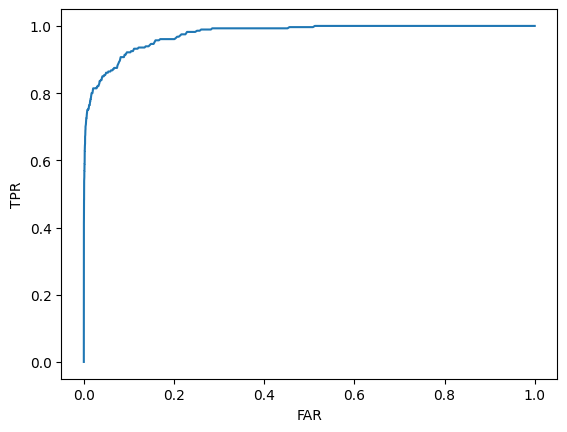

In [20]:
# INSERT CODE HERE
tpr, far, err, recall = plot_roc(similarity_matrix)

    ANS: Minimum and Maximum threshold should be the min and max value in the similarity matrix
    which made the starting point and ending point on 0 and 1.

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [21]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.
tpr_list, far_list, eer, recall = calculate_roc(similarity_matrix)
print(eer)
print(recall)

TPR at ERR: 0.9071428571428571
0.0908882783882784
0.5428571428571428


    ANS: EER = 0.0908882783882784 and Recall at rate = 0.1 is 0.5428571428571428

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

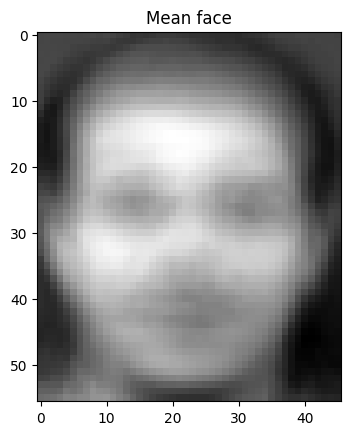

In [22]:
# INSERT CODE HERE
meanface = np.mean(T.reshape(120, 56*46), axis=0)
mean_image = meanface.reshape(56, 46)

plt.imshow(mean_image, cmap='gray')
plt.title("Mean face")
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [23]:
# TODO: Find the size and the rank of the covariance matrix.

In [24]:
A = T - meanface
cov_matrix = np.cov(A, rowvar=False)

size_cov = cov_matrix.shape
rank_cov = np.linalg.matrix_rank(cov_matrix)
print(size_cov, rank_cov)

(2576, 2576) 119


    ANS: Size is (2579, 2579) and Rank is 119


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [25]:
# TODO: Compute gram matrix.
gram_matrix = A @ A.T

size_gram = gram_matrix.shape
rank_gram = np.linalg.matrix_rank(gram_matrix)

eigenvalues = np.linalg.eigvalsh(gram_matrix)
non_zero_eigenvalues = np.sum(eigenvalues > 1e-10)

In [26]:
# TODO: Show size and rank of Gram matrix.
print(size_gram, rank_gram, non_zero_eigenvalues)

(120, 120) 119 119


    ANS: Gram matrix size is (120, 120)
         Gram Rank is 119
         Gram non-zero eigenvalues is 119


## T14. Is the Gram matrix also symmetric? Why?


    ANS: Yes, because the Gram matrix is defined as AA^T. Since any matrix multiplied by its own transpose results in a matrix where G = G^T, it is by definition symmetric.

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [27]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [28]:
non_zero_eigenvalues = np.sum(eigenvalues > 1e-5)
print(non_zero_eigenvalues)

119


    ANS: 119 non zero eigenvalues

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

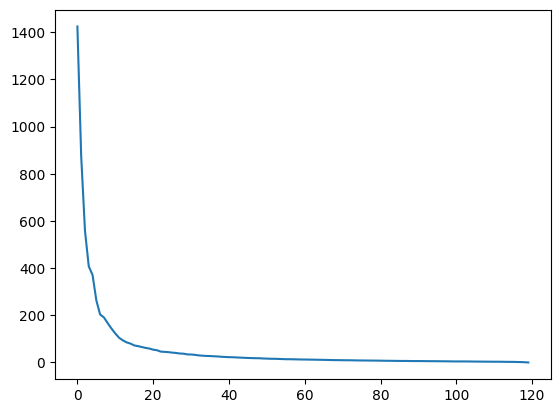

64


In [29]:
# INSERT CODE HERE
plt.plot(eigenvalues)
plt.show()

total_var = eigenvalues.sum()

idx = 0
curr_var = 0
while curr_var < total_var*0.95 or idx >= len(eigenvalues):
    curr_var += eigenvalues[idx]
    idx+=1
print(idx)

    ANS: 64 eigenvalues

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [30]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = A.T @ eigenvectors
v /= np.linalg.norm(v, axis=0)

In [31]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

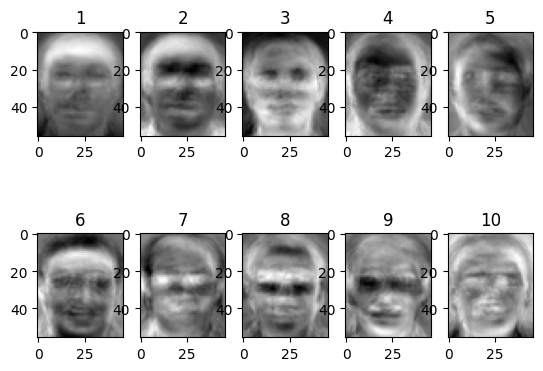

In [32]:
# TODO: Show the first 10 eigenvectors as images.
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(v[:, i].reshape(56, 46), cmap='gray')
    plt.title(i+1)
plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS:From the first eigenvector, It has a white color around the hair telling us that the hair is best feature to distingue. And the second eigenvector, It has a white color on eye and hair.
    No, because they arent cover all the face details.

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [33]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    projection_vectors = np.matmul(matrix - meanface, v[:,:])
    return projection_vectors

In [34]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:,:k]
D_reduced = calculate_projection_vectors(D, meanface, v)[:,:k]


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

In [35]:
# TODO: Get similarity matrix of T_reduced and D_reduced
reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

TPR at ERR: 0.9214285714285714


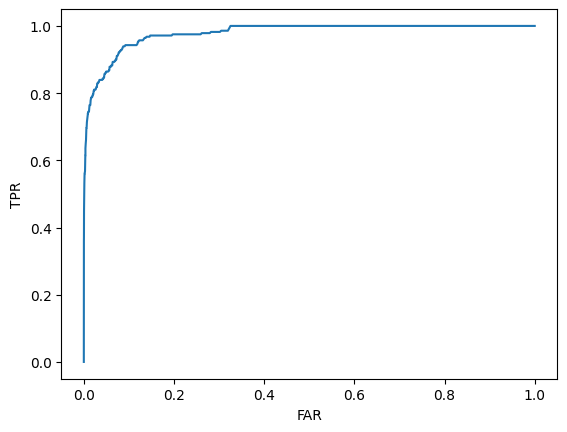

0.07870879120879123 0.5178571428571429


In [36]:
# TODO: Find EER and the recall rate at 0.1% FAR.
tpr, far, eer, recall = plot_roc(reduced_similarity_matrix)
print(eer, recall)

    ANS: EER = 0.07870879120879123
         Recall =  0.5178571428571429

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [37]:
# INSERT CODE HERE
k_values = np.linspace(5,14, num=10).astype(np.uint8)

eer_list = []

for k in k_values:
    T_reduced = calculate_projection_vectors(T, meanface, v)[:,:k]
    D_reduced = calculate_projection_vectors(D, meanface, v)[:,:k]
    reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)
    tpr, far, eer, recall = calculate_roc(reduced_similarity_matrix)
    eer_list.append(eer)

eer_list = np.array(eer_list)
best_eer = np.min(eer_list)
best_k = k_values[np.argmin(eer_list)]
print(best_k, best_eer)

TPR at ERR: 0.8928571428571429
TPR at ERR: 0.9071428571428571
TPR at ERR: 0.9071428571428571
TPR at ERR: 0.9142857142857143
TPR at ERR: 0.9178571428571428
TPR at ERR: 0.9214285714285714
TPR at ERR: 0.9214285714285714
TPR at ERR: 0.9142857142857143
TPR at ERR: 0.9142857142857143
TPR at ERR: 0.9178571428571428
11 0.07843406593406596


    ANS: k = 11 which is err = 0.07843406593406596

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: 80

In [38]:
# TODO: Define dimension of PCA.
t_images = 120
t_classes = 40

n_dim = t_images - t_classes
print(n_dim)

# TODO: Find PCA of T and D with n_dim dimension.
T_pca = calculate_projection_vectors(T, meanface, v)[:,:n_dim]
D_pca = calculate_projection_vectors(D, meanface, v)[:,:n_dim]

print(T_pca.shape, D_pca.shape)

80
(120, 80) (280, 80)


### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [39]:
# TODO: Find the LDA projection.
mean_class = []
for t in range(t_classes):
    mean_class.append(T_pca[3*t:3*t+3].mean(axis=0))
mean_class = np.array(mean_class).T
means = np.mean(mean_class, axis=1).reshape(-1,1)

Sw = np.zeros((n_dim, n_dim))
for t in range(t_classes):
    matrix = np.zeros((n_dim, n_dim))
    for i in range(3):
        d = T_pca[3*t+i].reshape(-1,1) - mean_class[:, t].reshape(-1,1)
        matrix += np.outer(d,d)
    Sw += matrix
Sw += np.eye(n_dim) * 1e-10

Sb = np.zeros((n_dim, n_dim))
for t in range(t_classes):
    d = mean_class[:, t].reshape(-1,1) - means
    Sb += np.outer(d, d)

LDA = np.linalg.inv(Sw) @ Sb

eigenvalues, eigenvectors = np.linalg.eig(LDA)

eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [40]:
# TODO: Find how many non-zero eigenvalues there are.
threshold = eigenvalues.max() * 1e-10
true_non_zero_count = np.sum(eigenvalues > threshold)

print(f"Number of non-zero eigenvalues: {true_non_zero_count}")

Number of non-zero eigenvalues: 39


    ANS: SwSb is not symmetric.
    No. Use numpy.linalg.eigh for the symmetrix matrix
    There are 39 non zero eigenvalues.
    

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

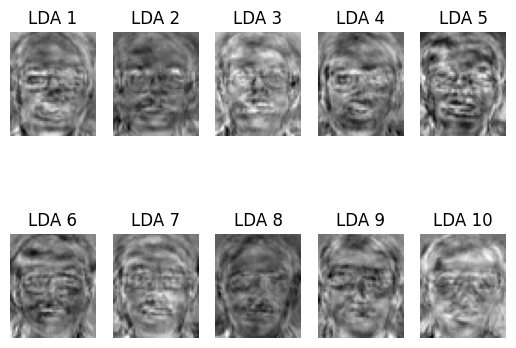

In [41]:
# INSERT CODE HERE
fisherfaces = v[:, :n_dim] @ eigenvectors[:, :10]
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(fisherfaces[:, i].reshape(56, 46), cmap='gray')
    plt.title(f'LDA {i+1}')
    plt.axis('off')
plt.show()

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

TPR at ERR: 0.9285714285714286


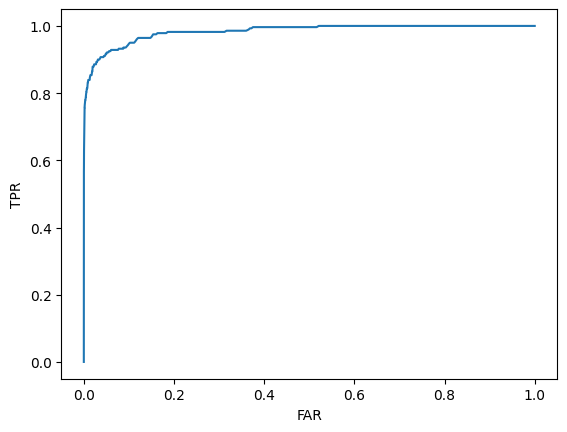

0.07106227106227105 0.6821428571428572


In [42]:
# INSERT CODE HERE
T_lda = T_pca @ eigenvectors[:,:39]
D_lda = D_pca @ eigenvectors[:,:39]
lda_similarity_matrix = generate_similarity_matrix(T_lda, D_lda)
tpr, far, eer, recall = plot_roc(lda_similarity_matrix)
print(eer, recall)

    ANS: EER = 0.07106227106227105
    And Recall = 0.6821428571428572

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

TPR at ERR: 0.9071428571428571
TPR at ERR: 0.9321428571428572
TPR at ERR: 0.9285714285714286


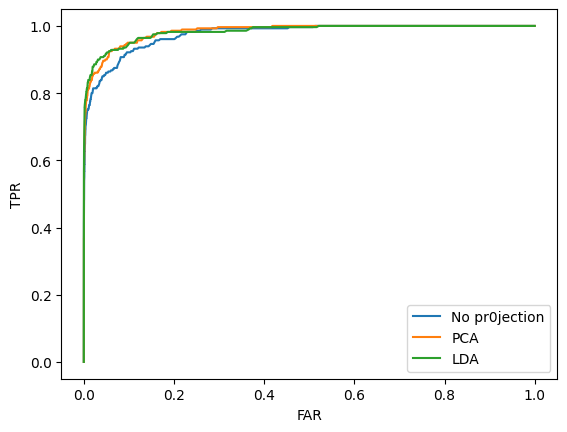

In [43]:
# INSERT CODE HERE
no_matrix = generate_similarity_matrix(T, D)
pca_matrix = generate_similarity_matrix(T_pca, D_pca)
lda_matrix = generate_similarity_matrix(T_lda, D_lda)
plot_roc(no_matrix, show=False, label="No pr0jection")
plot_roc(pca_matrix, show=False, label="PCA")
plot_roc(lda_matrix, show=False, label="LDA")
plt.legend()
plt.show()

    ANS: The best is LDA which is the same result as the err. And the worst is No projection.